In [3]:
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Creating datasets: 
train.csv and test.csv


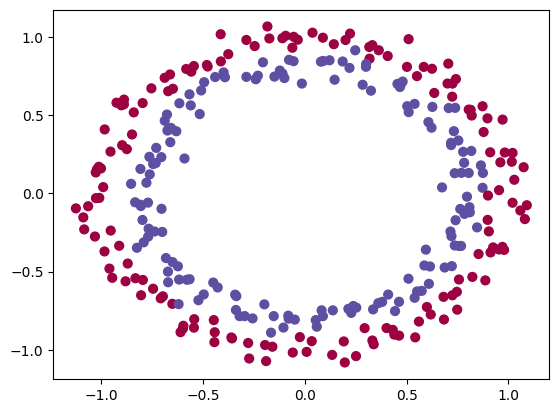

In [43]:
#Creates train.csv and test.csv datasets

def create_data():
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)

    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral)
    train_data = np.hstack((train_X, train_Y.reshape(-1 ,1)))
    test_data = np.hstack((test_X, test_Y.reshape(-1 ,1)))

    np.savetxt("train.csv", train_data, delimiter=",")
    np.savetxt("test.csv", test_data, delimiter=",")

    return train_data, test_data


train_data, test_data = create_data()

In [45]:
train_data.shape, test_data.shape

((300, 3), (100, 3))

Plotting decision boundaries for predicted datasets

In [1]:
def plot_decision_boundary(X, Y, predictions, file = None):
    X = X.T
    Y = Y.flatten()
    predictions = predictions.flatten()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid_points = np.c_[xx.ravel(), yy.ravel()]  
    Z = np.zeros(grid_points.shape[0])


    for i, point in enumerate(grid_points):
        distances = np.linalg.norm(X - point, axis=1)  
        nearest_idx = np.argmin(distances) 
        Z[i] = predictions[nearest_idx]

    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')

    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap='RdYlBu', s=20)


    plt.title("Decision Boundary" if file is None else f"Decision Boundary On {file} Dataset")
    plt.show()


In [4]:
predictions_train = pd.read_csv("predictions_train.csv", header=None, skiprows=1).to_numpy()
train_data = pd.read_csv("train.csv", header=None).to_numpy()
train_X = train_data[:, :-1].T
train_Y = train_data[:, -1].reshape(-1, 1).T

predictions_test = pd.read_csv("predictions_test.csv", header=None, skiprows=1).to_numpy()
test_data = pd.read_csv("test.csv", header=None).to_numpy()
test_X = test_data[:, :-1].T
test_Y = test_data[:, -1].reshape(-1, 1).T

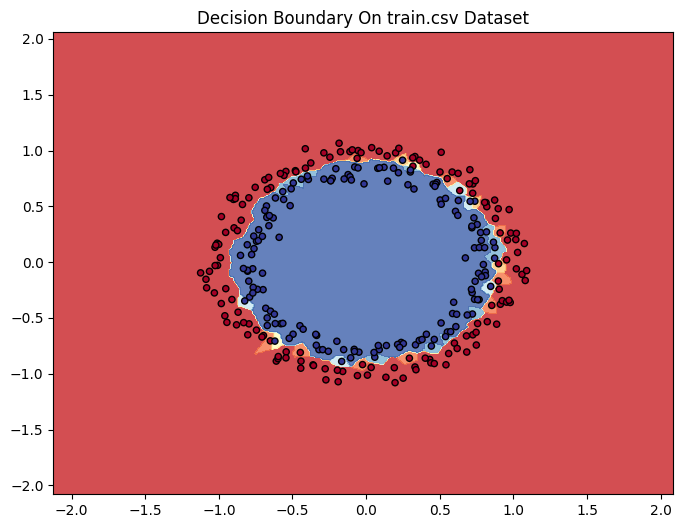

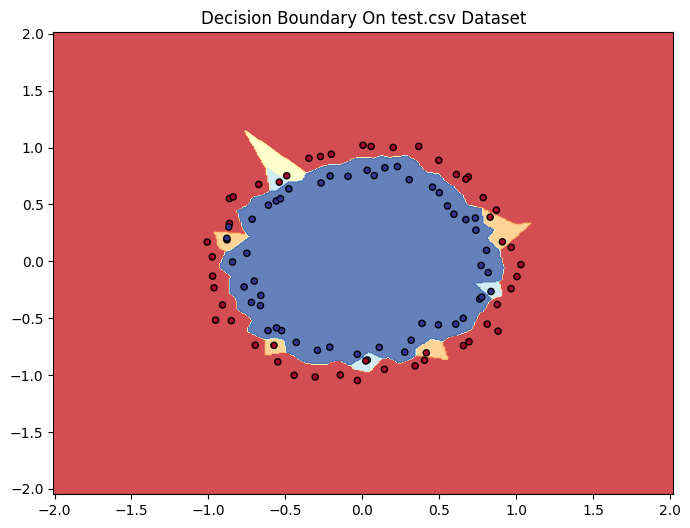

In [5]:
plot_decision_boundary(train_X, train_Y, predictions_train, "train.csv")
plot_decision_boundary(test_X, test_Y, predictions_test, "test.csv")